# Intraretinal cyst fluid detection using Deep Learning
<img src="../images/project.png" width="350" height="350" align="right">

*Abstract— This work aims to develop an algorithm for automatic segmentation of fluid types in retina fundus images using U-net, with annotated images provided by two clinical centers, which were acquired with the three most common [OCT](https://en.wikipedia.org/wiki/Optical_coherence_tomography) device vendors from patients with two different retinal diseases*.  

The rest of the project can be found on the [intraretinal-cyst-fluid-detection](project https://github.com/gabrielraya/intraretinal-cyst-fluid-detection) repository on Github.

## Clinical background

Retinal vessel segmentation and delineation of morphological attributes of retinal blood vessels, such as length, width, tortuosity, branching patterns and angles are utilized for the diagnosis, screening, treatment, and evaluation of various cardiovascular and ophthalmologic diseases such as diabetes, hypertension, arteriosclerosis and chorodial neovascularization.

Automatic detection and analysis of the vasculature can assist in the implementation of screening programs for diabetic retinopathy, can aid research on the relationship between vessel tortuosity and hypertensive retinopathy, vessel diameter measurement in relation with diagnosis of hypertension, and computer-assisted laser surgery.

Automatic generation of retinal maps and extraction of branch points have been used for temporal or multimodal image registration, retinal image mosaic synthesis. Moreover, the retinal vascular tree is found to be unique for each individual and can be used for biometric identification.

## Data 

In this assignment, we are going to develop a system to automatically **segment vessels** in human retina fundus images. For this purpose, we are going to use data from the publicly available DRIVE dataset (http://www.isi.uu.nl/Research/Databases/DRIVE/).
The DRIVE dataset consists of 40 images, 20 used for training and 20 used for testing. Each case contains:
* a fundus (RGB) image
* a binary mask, which indicates the area of the image that has to be analyzed (removing black background)
* manual annotations of retinal vessels, provided as a binary map

## Clinical background

Retinal vessel segmentation and delineation of morphological attributes of retinal blood vessels, such as length, width, tortuosity, branching patterns and angles are utilized for the diagnosis, screening, treatment, and evaluation of various cardiovascular and ophthalmologic diseases such as diabetes, hypertension, arteriosclerosis and chorodial neovascularization.

Automatic detection and analysis of the vasculature can assist in the implementation of screening programs for diabetic retinopathy, can aid research on the relationship between vessel tortuosity and hypertensive retinopathy, vessel diameter measurement in relation with diagnosis of hypertension, and computer-assisted laser surgery.

Automatic generation of retinal maps and extraction of branch points have been used for temporal or multimodal image registration, retinal image mosaic synthesis. Moreover, the retinal vascular tree is found to be unique for each individual and can be used for biometric identification.

## Data 
**RETOUCH dataset**
In this assignment, we are going to develop a system to automatically **segment vessels** in human retina fundus images. For this purpose, we are going to use data from the publicly available DRIVE dataset (http://www.isi.uu.nl/Research/Databases/DRIVE/).
The DRIVE dataset consists of 40 images, 20 used for training and 20 used for testing. Each case contains:
* a fundus (RGB) image
* a binary mask, which indicates the area of the image that has to be analyzed (removing black background)
* manual annotations of retinal vessels, provided as a binary map



## Tasks for this assignment
<img src="images/submission.png" width="500" align="right" style="padding-left:20px">
1. Develop a system to segment vessels in retinal images in this notebook. You will have to submit this notebook with your code, which we will run and evaluate, together with the results of the segmentation.
2. Use the training set provided with the DRIVE dataset to train/tune the parameters of your system. You cannot use data from the test set available on the DRIVE website, nor from other datasets. 
3. Apply it to the test dataset and generate a binary map of the segmented vessel. The map must have the same size as the input image.
4. Submit the results of your algorithm to the mini-challenge framework. You can create a zip-file by running the corresponding cell at the end of the notebook. You will have to **submit** this file to the mini-challenge framework (https://drive.grand-challenge.org/). In order to submit results, click on the **Submit** tab on grand-challenge, then click on the **Choose File** button to select your .zip "Predictions File" and submit it. You can monitor the execution of your submission by clicking on the link at the end of the page. Note that while grading your assignment, we will run your implementation and reproduce your results. Any significant discrepancy between the results submitted to the mini-challenge framework and the one computed using this notebook will be penalized and discussed with the student. **Note**: It is allowed to submit multiple times, checking the performance of different results of your algorithm. In order to keep track of your submissions, you can add a comment when you submit your .zip file.
5. Once you have completed your assignment, submit this notebook via grand-challenge.org, by clicking on the "Jupyter Notebook" submission button. 


## Implementation 

### First task:
You will be asked to implement your vessel segmentation system based on **pixel classification based on texture analysis**.
For this purpose, you can use the following publications as reference:

* [1] M. Niemeijer et al. "Comparative study of retinal vessel segmentation methods on a new publicly available database" (the paper suggested last week)
* [2] Y. Yang et al., "An automatic hybrid method for retinal blood vessel extraction"
* [3] M.M. Fraz et al., "Blood vessel segmentation methodologies in retinal images - A survey"

The first paper explains how to segment retinal vessels using pixel classification.
In this assignment, you should implement the solution based on pixel classification as is explained in section 2.3.5 of the first paper. 

### Second task: 
Next, try to **improve the segmentation** result. The goal is to design the best CAD system for vessel segmentation and validate its performance on the DRIVE dataset! A few ideas to improve the system are:

* More features (Directional filters, local binary patterns, Gabor filters, etc.). Get creative!
* Postprocessing to improve the results using morphological filtering
* More training samples
* etc.

## Overview

This is a introductory notebook to undertand the problem of cyst fluid detection, for this we are going to implement and apply some basic image processing techniques to first get familiar with the medical imaging data this project uses.


We will implement the following techniques:
1. conversion of raw mammography data into a gray-scale / color image
2. Split the data
3. Batch data creation


1. Load data: download the data, import and convert to numpy, inspect the available annotations.
2. Feature extraction: Implement texture analysis to extract features from the images and create a training set.
3. Train the classifier: for example a nearest-neighbour classifier.
4. Test the classifier: apply the classifier to new data to obtain a new vessel map.
5. Submit your results: submit the output of your algorithm to grand-challenge, where it will be evaluated and compared to other submissions.

## Libraries

First, we import the basic libraries necessary to develop this assignment. Feel free to include more libraries if needed.


In [2]:
# Run this when using Colab
#!pip install SimpleITK
#!pip install -U pydicom

In [1]:
import requests
import zipfile
from tqdm import tnrange, tqdm_notebook
import os
import SimpleITK as sitk
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline 
import numpy as np
from PIL import Image
import pydicom as dicom
from IPython import display
import time
from mpl_toolkits.mplot3d import Axes3D
import copy
matplotlib.rcParams['figure.figsize'] = [8, 6]
import scipy.signal

## Data

This notebook has been prepared to work directly from Colab but you can also work from any other resource.  The next cells import the data from the drive team folder, but you can also directly download the zip file from  [drive](https://drive.google.com/open?id=1Y2XKig36mh2WuJ-1ArJWoF-tlgKp8UnT).  To do so, you need to give Colab acces to your drive account.

In [3]:
# Only run this code when using Colab
#from google.colab import drive
#drive.mount('/content/gdrive')

Define the path where data is stored

In [4]:
DATA_FOLDER = './cyst_segmentation_ISMI_training_set/'                                  # Local System
#DATA_FOLDER = 'gdrive/Team Drives/ISMI-FinalProject/cyst_segmentation_ISMI_training_set/' # Colab

In [5]:
#!ls 'gdrive/Team Drives/ISMI-FinalProject/cyst_segmentation_ISMI_training_set/'
!ls './cyst_segmentation_ISMI_training_set'

annotations
data_usage_policy.pdf
images


Check that the data folder contains the following structure:
````
cyst_segmentation_ISMI_training_set
  |-images
    |-pat001_im001.mdh
    |-pat001_im001.raw
    |-...
  |-annotations
    |-pat001_im001.mhd
    |-pat001_im001.zraw
    |-...
````

###  Data Inspection

This first part consists in reconstructing the given images from the raw data acquired with the tommoography machine. There are several steps that have to be applied to reconstruct a gray-scale image that can actually be read by radiologists with the aim of detecting these three type of fluids in the retina.

**This process might take some time** : Please, be patient. This is reading the 112 volumentric with their n-corresponding B scans.

In [6]:
def get_file_list(path, ext=''):
    return sorted([os.path.join(path, f) for f in os.listdir(path) if f.endswith(ext)])

def load_img(path):
    return sitk.GetArrayFromImage(sitk.ReadImage(path))

# get path names list of raw data in ITK format
x_img_files = get_file_list(os.path.join(DATA_FOLDER,'images/'), 'mhd')
y_img_files = get_file_list(os.path.join(DATA_FOLDER,'annotations/'), 'mhd')


# read ITK files using SimpleITK and conver then into a list of numpy arrays
X = [load_img(f) for f in x_img_files]
Y = [load_img(f) for f in y_img_files]

Let's verify the number of X sample files is the same as the number of annotated images Ys.

In [10]:
print("Number of list files X:{} , Y:{}".format(len(x_img_files),len(y_img_files)))
print("Number of samples X:{} , Y:{}".format(len(X),len(Y)))
print("Shape of first volumetric object X[0]: {}".format(X[0].shape))

Number of list files X:122 , Y:122
Number of samples X:122 , Y:122
Shape of first volumetric object X[0]: (18, 496, 508)


Define a function to visualize (1) the b-scan image, (2) the manual annotation. Notice the use of the argument ```cmap``` to change the ```colormap``` of the visualization. 

In [21]:
def show_image(img, lbl):
    s, h, w = img.shape 
    for i in range(s):
        plt.subplot(1,2,1)
        plt.imshow(img[i], cmap='gray')
        plt.title('RGB image')

        plt.subplot(1,2,2)
        plt.imshow(lbl[i], cmap='gray')
        plt.title('Manual annotation')
        plt.show()

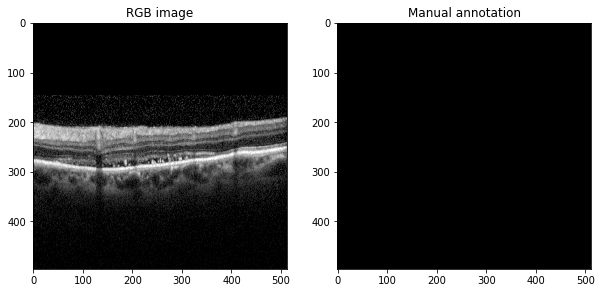

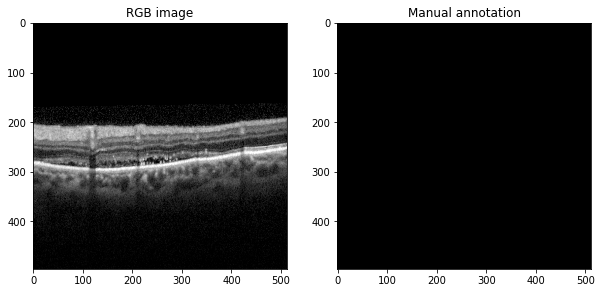

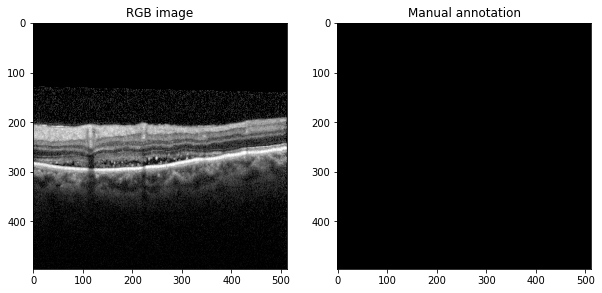

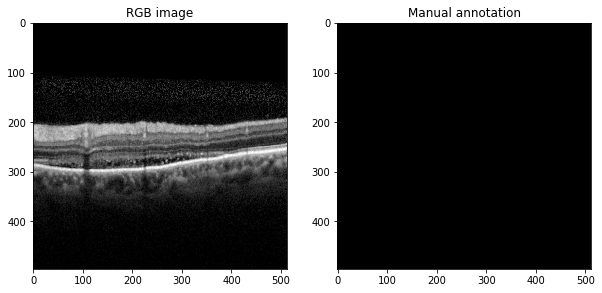

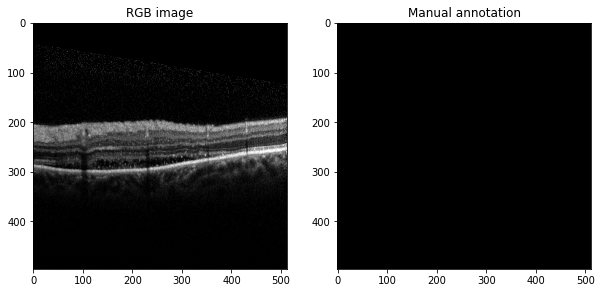

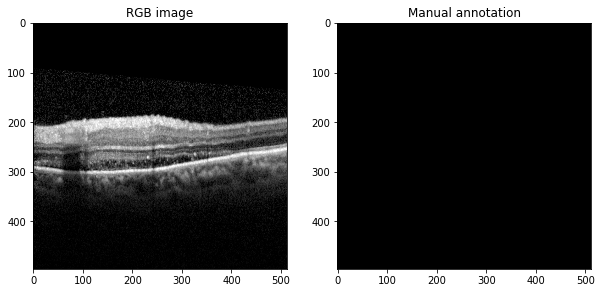

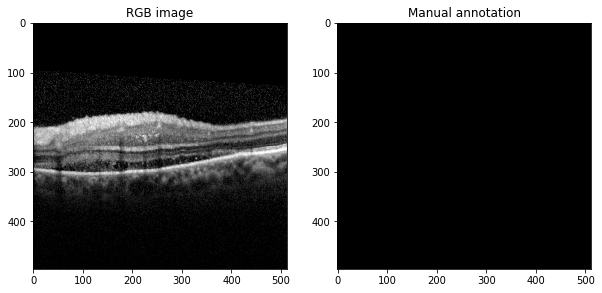

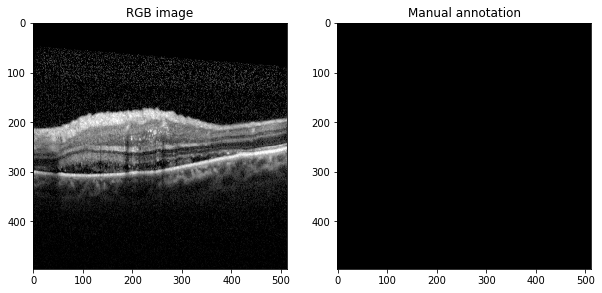

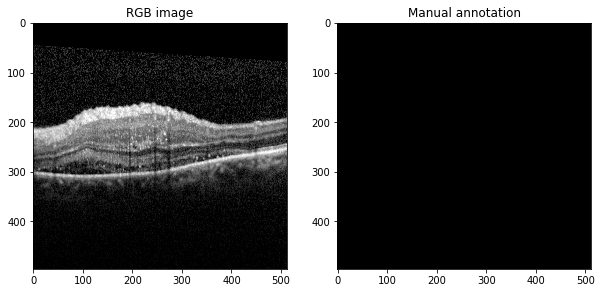

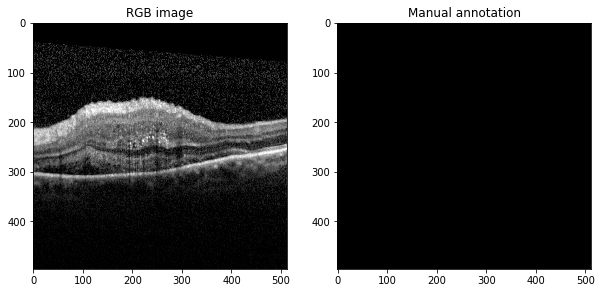

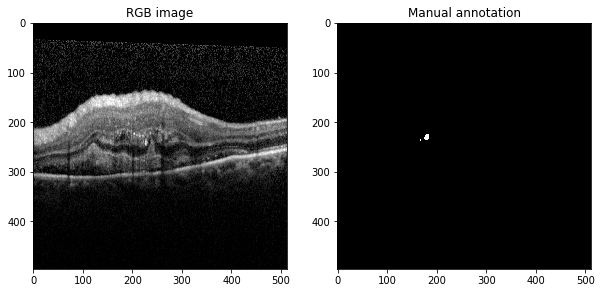

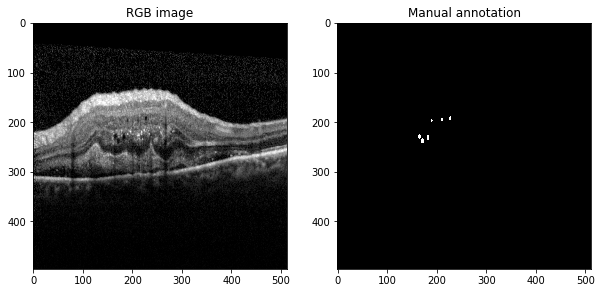

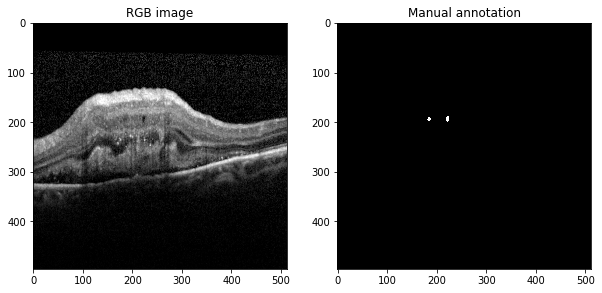

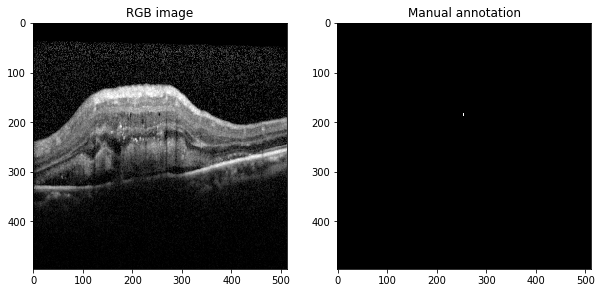

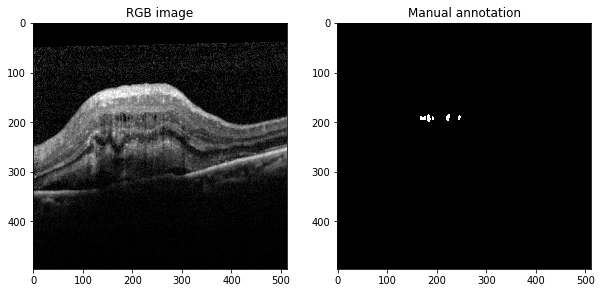

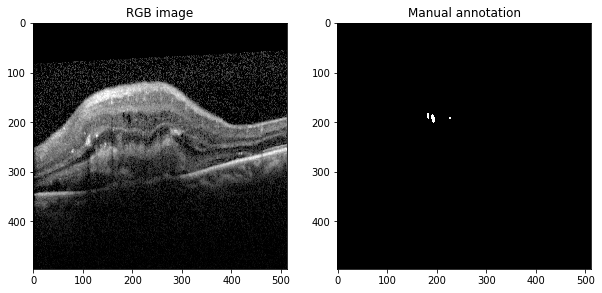

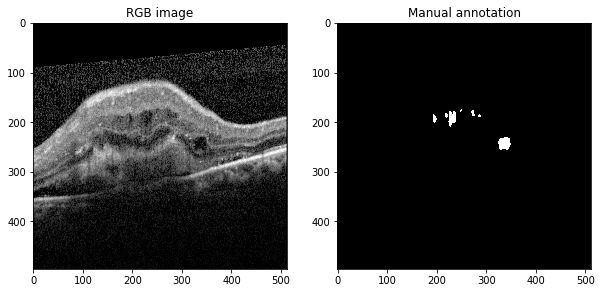

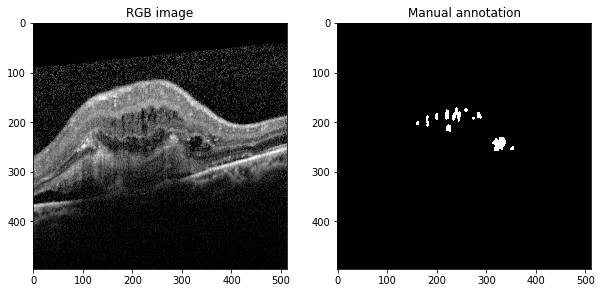

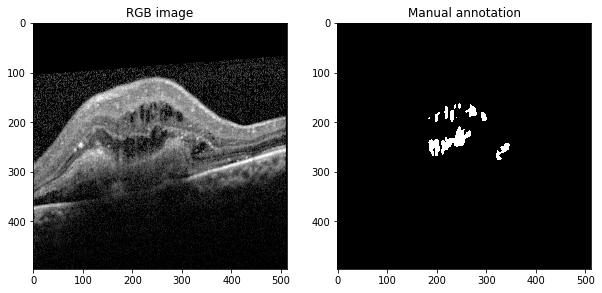

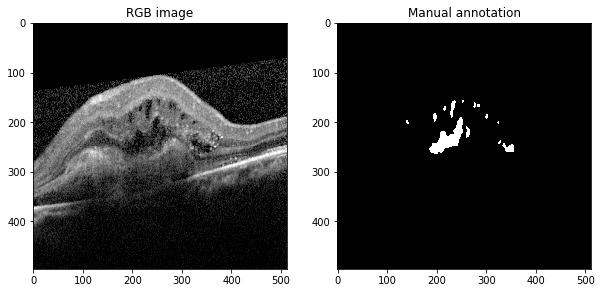

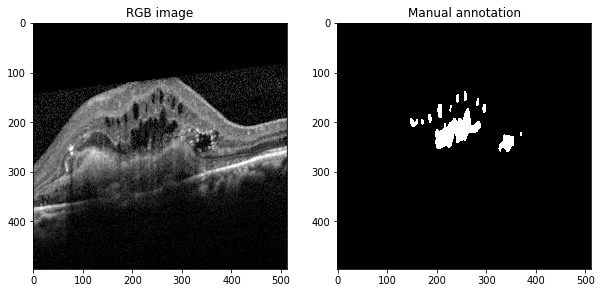

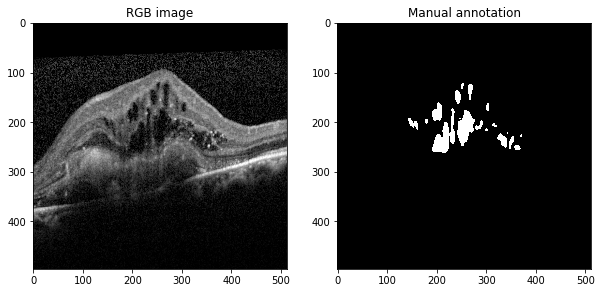

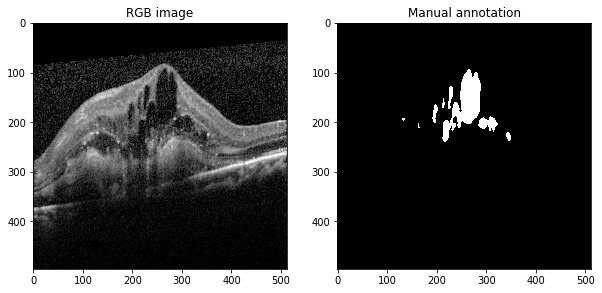

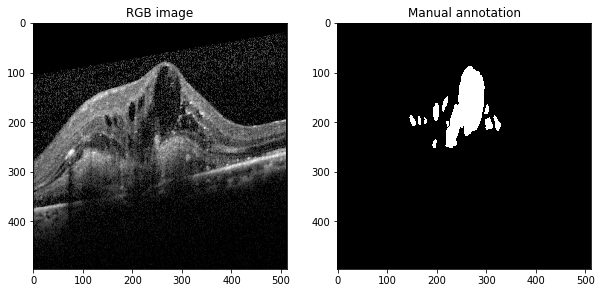

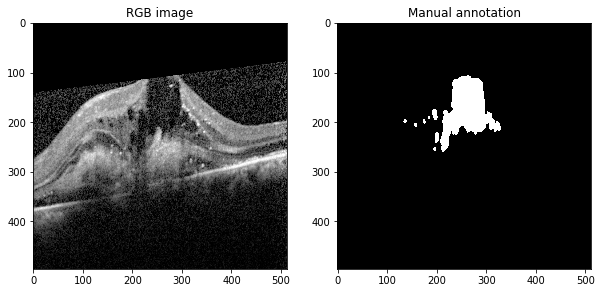

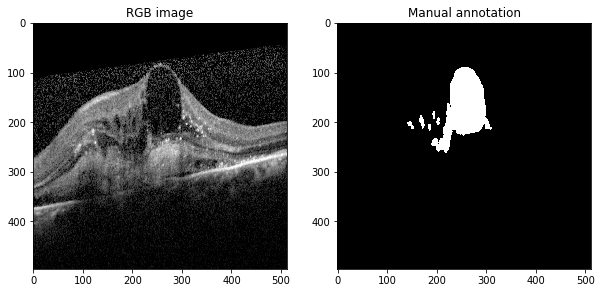

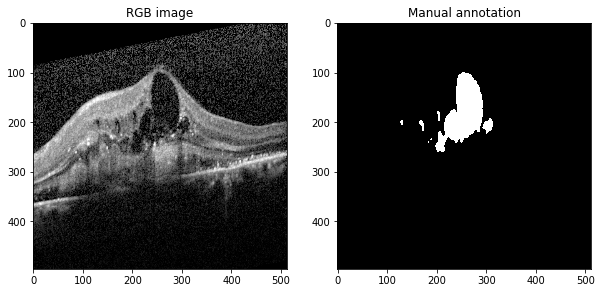

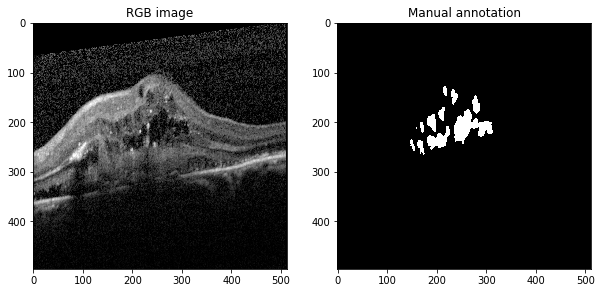

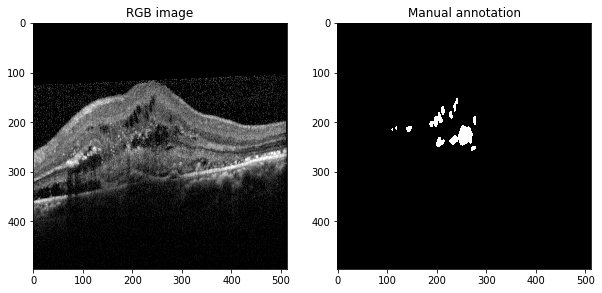

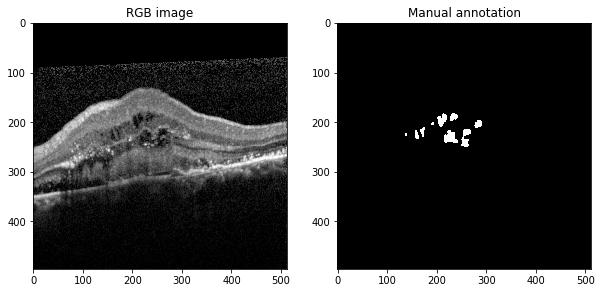

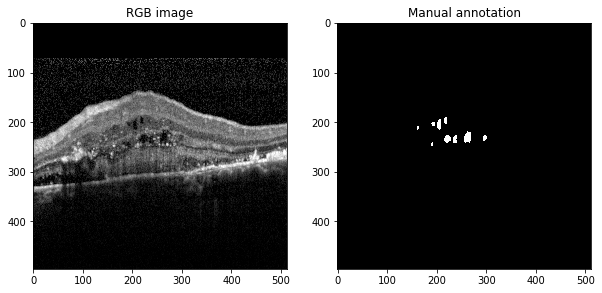

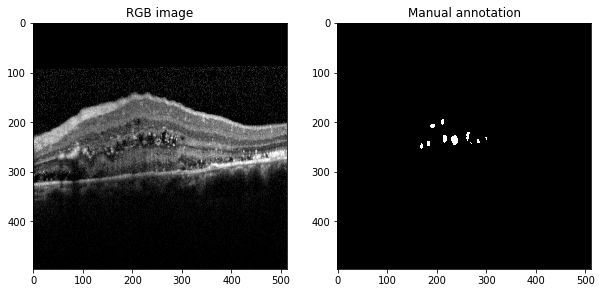

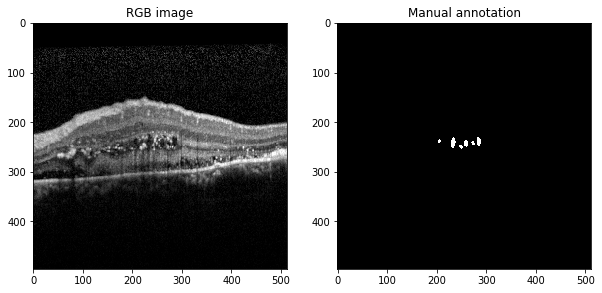

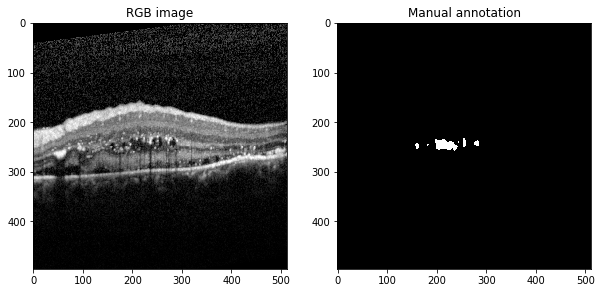

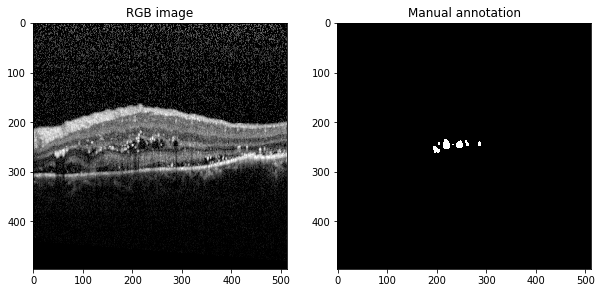

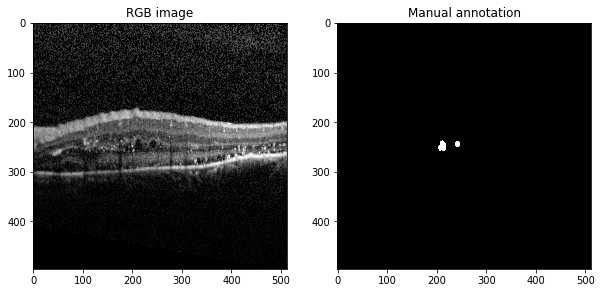

In [24]:
i = 21  # select the image 
show_image(X[i], Y[i])

In [0]:
class DataSet:
    
    def __init__(self, imgs, lbls=None):
        self.imgs = imgs
        self.lbls = lbls
    
    def get_lenght(self):
        return len(self.imgs)
    
    def show_image(self, i):
        if self.lbls != None:
            f, axes   = plt.subplots(1, 2)
            img_slice = self.imgs[i]
            lbls_slice= self.lbls[i]
            s = img_slice.shape[0]
            for ax, im, t in zip(axes, 
                                 (img_slice[i], lbls_slice[i]), 
                                 ('RGB image', 
                                  'Manual annotation; Range: [{}, {}]'.format(self.lbls[i].min(), 
                                                                              self.lbls[i].max()))):
                ax.imshow(im)
                ax.set_title(t)
        else:
            plt.imshow(self.imgs[i])
            plt.title('RGB image')
        plt.show()
        
        


Images in the training set are currently in the same order as read from disk. To avoid any bias possibly introduced by this order, it is always good to shuffle the training dataset. Note that images and annotations must be shuffled in the same way!

In [0]:
import random
# shuffle order of training images and manual annotations
indexes = list(range(len(X)))
random.shuffle(indexes)
indexes

train_imgs = list(np.asarray(X)[indexes])
train_lbls = list(np.asarray(Y)[indexes])

In [0]:
train_imgs[0].shape

(18, 496, 508)

In [0]:
len(train_imgs)

122

### Split into training and validation set
Now we can define a training and a validation set by using the Dataset class that we have defined. In order to define a validation set, you have to specify a coefficient (from 0 to 1) to indicate the percentage of training images that you want to use for validation (we have seen that typical splits are 70/30, 80/20 etc.

In [0]:
validation_percent = 0.2 # coefficient to define validation dataset (value between 0 and 1)

In [0]:
n_validation_imgs = int(validation_percent * len(train_imgs))

# use the first images as validation
validation_dataset = DataSet(train_imgs[:n_validation_imgs], train_lbls[:n_validation_imgs])

# the rest as training
training_dataset = DataSet(train_imgs[n_validation_imgs:], train_lbls[n_validation_imgs:])

# test dataset
#test_dataset = DataSet(test_imgs)

n_tra_imgs = training_dataset.get_lenght()
n_val_imgs = validation_dataset.get_lenght()
#n_tes_imgs = test_dataset.get_lenght()

print('{} training images'.format(n_tra_imgs))
print('{} validation images'.format(n_val_imgs))
#print('{} test images'.format(n_tes_imgs))

98 training images
24 validation images


### Visualize datasets
Let's visualize images in the training, the validation and the test set.

In [0]:
# training set
#for i in range(n_tra_imgs):
#    training_dataset.show_image(i)
    
i = 19# Try some values here    
show_image(X[i], Y[i])

Output hidden; open in https://colab.research.google.com to view.